In [27]:
import pandas as pd

df = pd.read_csv('data/telco_churn_raw.csv')

print('shape of dataset:', df.shape)
df.head()

shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 1: Check for Missing Data

In [28]:
#Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Step 2: Check Data types

In [29]:
# Step 2: Check column data types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Step 3: Inspect key columns

In [30]:
# Step 3: Inspect key columns to plan cleaning
print(df['TotalCharges'].unique()[:10])
print(df['Churn'].unique())
print(df['SeniorCitizen'].unique())


['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
['No' 'Yes']
[0 1]


### Convert TotalCharges to numeric

In [31]:
#Convert total charges to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

### Step 4: convert only Yes/No columns to binary

In [32]:
# Step 4: Convert Yes/No columns to binary (1/0)
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Confirm conversion
df[binary_columns].head()


,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


### Step 5A: List all object type columns

In [33]:
# Step 5A: List all object-type columns (usually categorical)
df.select_dtypes(include='object').columns.tolist()


['customerID',
 'gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

### Step 5B: Drop Unecessary and one-hot encode

In [34]:
# Step 5B: Drop unnecessary columns and one-hot encode categorical variables

# Drop customerID
df = df.drop('customerID', axis=1)

# Define categorical columns to encode
categorical_cols = ['gender', 'MultipleLines', 'InternetService', 
                    'Contract', 'PaymentMethod']

# Apply one-hot encoding with drop_first to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Confirm changes
print("New shape after encoding:", df_encoded.shape)
df_encoded.head()


New shape after encoding: (7043, 25)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,No,Yes,No,No,No,...,False,True,False,False,False,False,False,False,True,False
1,0,0,0,34,1,Yes,No,Yes,No,No,...,True,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,Yes,Yes,No,No,No,...,True,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,Yes,No,Yes,Yes,No,...,True,True,False,False,False,True,False,False,False,False
4,0,0,0,2,1,No,No,No,No,No,...,False,False,False,True,False,False,False,False,True,False


### Step 6A: Churn Distribution Plot

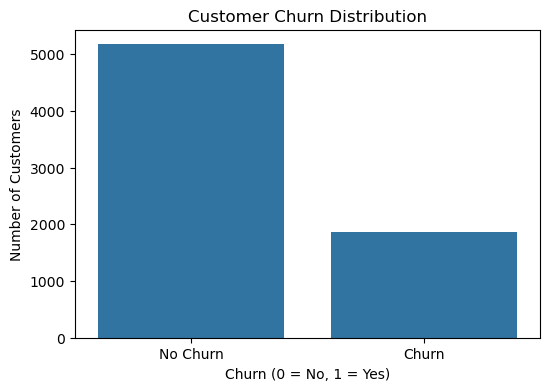

In [38]:
# Step 6A: Churn distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


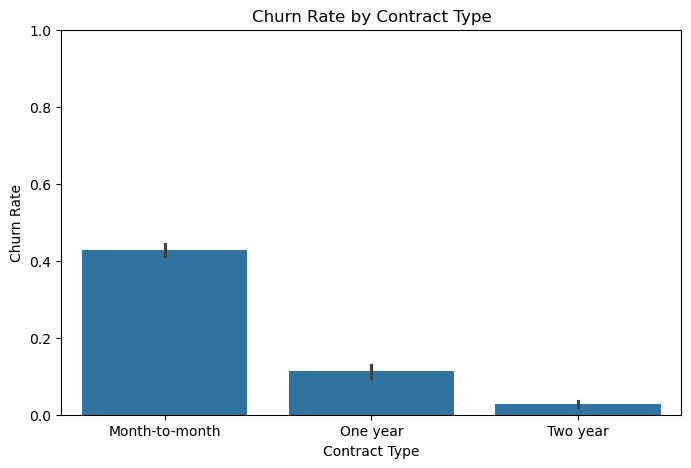

In [48]:
# Step 6B: Churn Rate by Contract Type

plt.figure(figsize=(8, 5))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()


### Step 6C: Monthly Charges by Churn Status

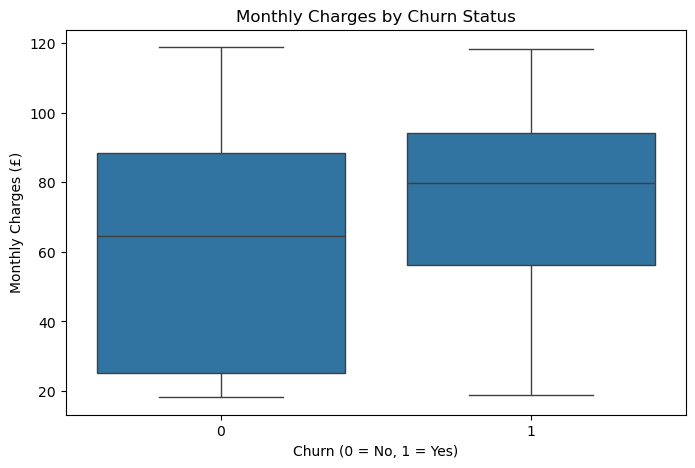

In [49]:
# Step 6C: Visualise Monthly Charges for Churned vs Non-Churned Customers

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges (£)')
plt.show()


### Step 6C.2: Tenure by Churn Status

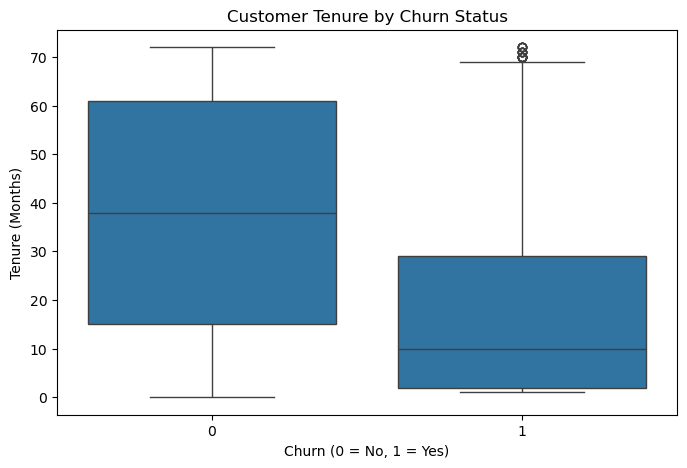

In [50]:
# Step 6C.2: Tenure by Churn Status

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Customer Tenure by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Months)')
plt.show()


### Step 6D: Correlation HeatMap

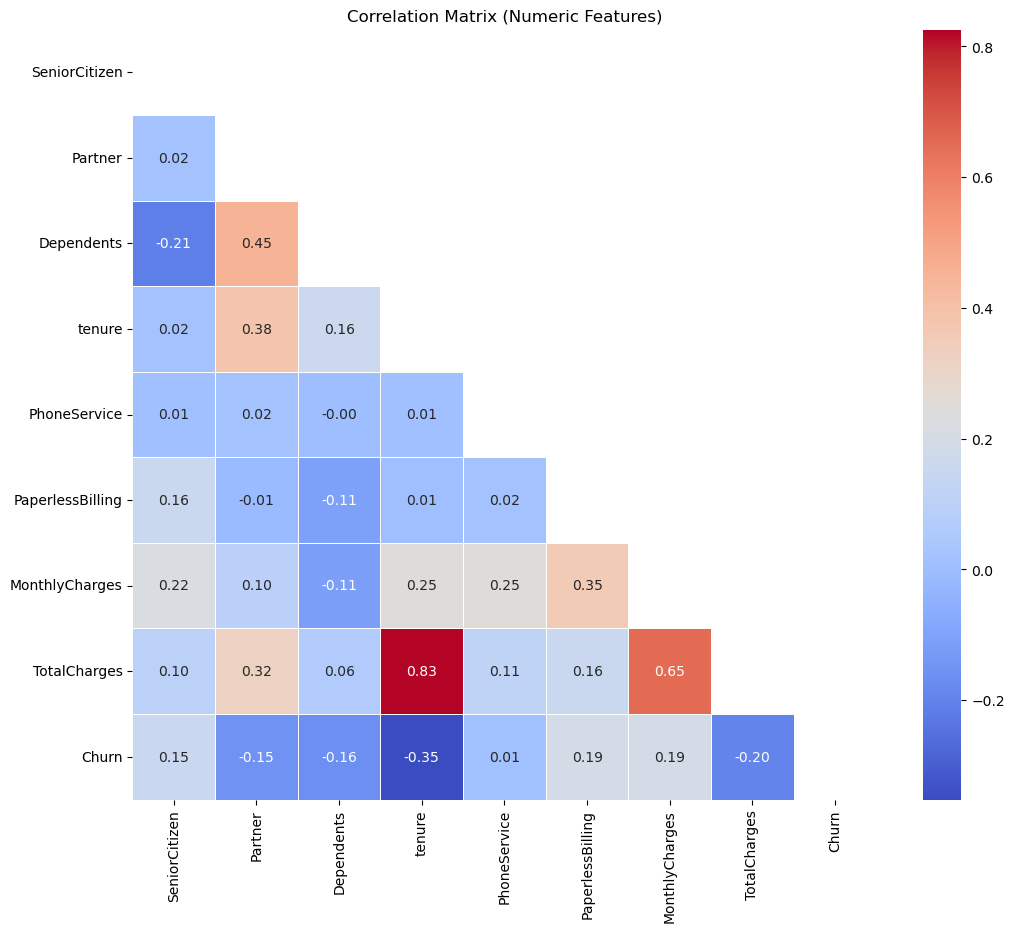

In [52]:
# Step 6D: Correlation Heatmap

import numpy as np

plt.figure(figsize=(12, 10))

# Use only numeric columns
numeric_df = df_encoded.select_dtypes(include='number')
corr = numeric_df.corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()



### Step 7: Export Cleaned Dataset for Power BI

In [53]:
# Step 7: Export Cleaned Dataset for Power BI

# Export the cleaned, encoded DataFrame to CSV
df_encoded.to_csv('cleaned_churn_data_for_powerbi.csv', index=False)

print("Export complete. File saved as 'cleaned_churn_data_for_powerbi.csv'")


Export complete. File saved as 'cleaned_churn_data_for_powerbi.csv'
